## 1 기술통계

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
wine = pd.read_csv('./data/winequality-both.csv', sep=',', header=0)
wine.columns = wine.columns.str.replace(' ', '_')

print(wine.head())

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality
0  red            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1  red            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2  red            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3  red           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4  red            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        

In [3]:
print(wine.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density           pH    sulphates      alcohol      quality
count    6497.000000       6497.000000  6497.000000     6497.000000  6497.000000          6497.000000           6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000
mean        7.215307          0.339666     0.318633        5.443235     0.056034            30.525319            115.744574     0.994697     3.218501     0.531268    10.491801     5.818378
std         1.296434          0.164636     0.145318        4.757804     0.035034            17.749400             56.521855     0.002999     0.160787     0.148806     1.192712     0.873255
min         3.800000          0.080000     0.000000        0.600000     0.009000             1.000000              6.000000     0.987110     2.720000     0.220000     8.000000     3.000000
25%         6.400000          0.230000     0.250000    

In [4]:
print(sorted(wine.quality.unique()))

[3, 4, 5, 6, 7, 8, 9]


In [5]:
print(wine.quality.value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


## 2 그룹화, 히스토그램, t 검정

In [8]:
print(wine.groupby('type')[['quality']].describe().unstack('type'))

                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64


In [9]:
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))

     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


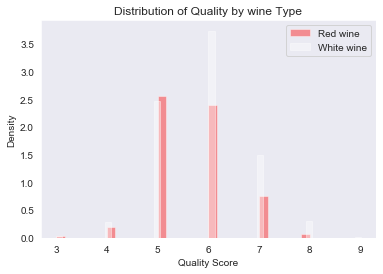

        quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909
tstat: -9.686 pvalue: 0.0000


In [16]:
red_wine = wine.ix[wine['type'] == 'red', 'quality']
white_wine = wine.ix[wine['type'] == 'white', 'quality']

sns.set_style('dark')

print(sns.distplot(red_wine, norm_hist=True, kde=False, color='red', label='Red wine'))

print(sns.distplot(white_wine, norm_hist=True, kde=False, color='white', label='White wine'))

plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.title('Distribution of Quality by wine Type')
plt.legend()
plt.show()

print(wine.groupby(['type'])[['quality']].agg(['std', 'mean']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

## 3 상관관계 분석

In [17]:
print(wine.corr())

                      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol   quality
fixed_acidity              1.000000          0.219008     0.324436       -0.111981   0.298195            -0.282735             -0.329054  0.458910 -0.252700   0.299568 -0.095452 -0.076743
volatile_acidity           0.219008          1.000000    -0.377981       -0.196011   0.377124            -0.352557             -0.414476  0.271296  0.261454   0.225984 -0.037640 -0.265699
citric_acid                0.324436         -0.377981     1.000000        0.142451   0.038998             0.133126              0.195242  0.096154 -0.329808   0.056197 -0.010493  0.085532
residual_sugar            -0.111981         -0.196011     0.142451        1.000000  -0.128940             0.402871              0.495482  0.552517 -0.267320  -0.185927 -0.359415 -0.036980
chlorides                  0.298195          0.377124     0.

In [19]:
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]

reds_sample = take_sample(wine.loc[wine['type'] == 'red', :])
whites_sample = take_sample(wine.loc[wine['type'] == 'white', :])

In [20]:
wine_sample = pd.concat([reds_sample, whites_sample])

wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1., 0.)

print(pd.crosstab(wine.in_sample, wine.type, margins=True))

type        red  white   All
in_sample                   
0.0        1399   4698  6097
1.0         200    200   400
All        1599   4898  6497


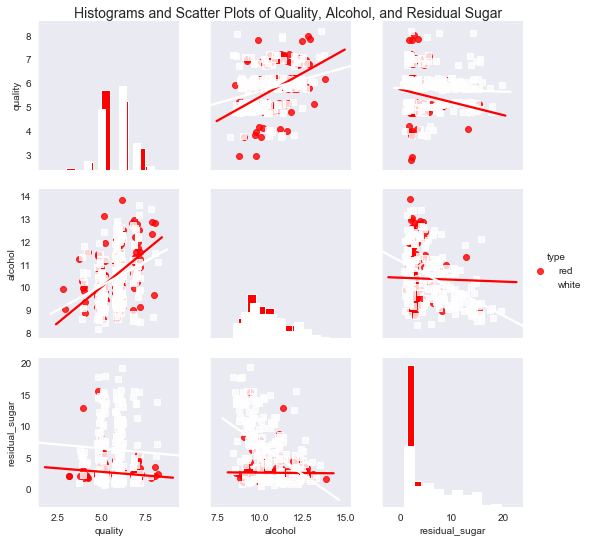

In [22]:
sns.set_style('dark')

g = sns.pairplot(wine_sample, kind='reg', plot_kws={'ci': False, 'x_jitter': 0.25, 'y_jitter': 0.25},
                hue='type', diag_kind='hist', diag_kws={'bins': 10, 'alpha': 1.0},
                palette=dict(red='red', white='white'),
                markers=['o', 's'], vars=['quality', 'alcohol', 'residual_sugar'])
print(g)

plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize=14, 
             horizontalalignment='center', verticalalignment='top', x=0.5, y=0.999)

plt.show()

## 4 최소제곱법을 이용한 선형회귀분석

In [25]:
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'

lm = ols(my_formula, data=wine).fit()

print(lm.summary())
print('\nQuantities you can extract from the result:\n%s' % dir(lm))
print('\nCoefficients:\n%s' % lm.params)
print('\nCoefficient Std Errors:\n%s' % lm.bse)
print('\nAdj. R-squared:\n%.2f' % lm.rsquared_adj)
print('\nF-statistic: %.1f P-value: %.2f' % (lm.fvalue, lm.f_pvalue))
print('\nNumber of obs: %d Number of fitted values: %s' % (lm.nobs, len(lm.fittedvalues)))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:29:16   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

## 6 독립변수의 표준화

In [27]:
dependent_variable = wine['quality']
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)

In [28]:
lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        23:32:04   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

## 7 예측하기

In [29]:
new_observations = wine.ix[wine.index.isin(range(10)), independent_variables.columns]
y_predicted = lm.predict(new_observations)
y_predicted_rounded = [round(score, 2) for score in y_predicted]
print(y_predicted_rounded)

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
